In [83]:
## Advanced Course in Machine Learning
## Week 4
## Exercise 2 / Probabilistic PCA

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import linalg as LA

sns.set_style("darkgrid")

In [85]:
def build_dataset(N, D, K, sigma=1):
    x = np.zeros((D, N))
    z = np.random.normal(0.0, 1.0, size=(K, N))
    # Create a w with random values
    w = np.random.normal(0.0, sigma**2, size=(D, K))
    
    mean = np.dot(w, z)
    
    for d in range(D):
        for n in range(N):
            x[d, n] = np.random.normal(mean[d, n], sigma**2)

    print("True principal axes:")
    print(w)
    return x, mean, w, z

N = 5000  # number of data points
D = 2  # data dimensionality
K = 1  # latent dimensionality
sigma = 1.0

x, mean, w, z = build_dataset(N, D, K, sigma)

True principal axes:
[[-0.60928742]
 [ 0.06539077]]


In [86]:
print(z)

[[ 0.15935665 -0.89767049 -1.66636704 ... -0.66798166  1.62407392
  -0.52317225]]


In [88]:
print(w)

[[-0.60928742]
 [ 0.06539077]]


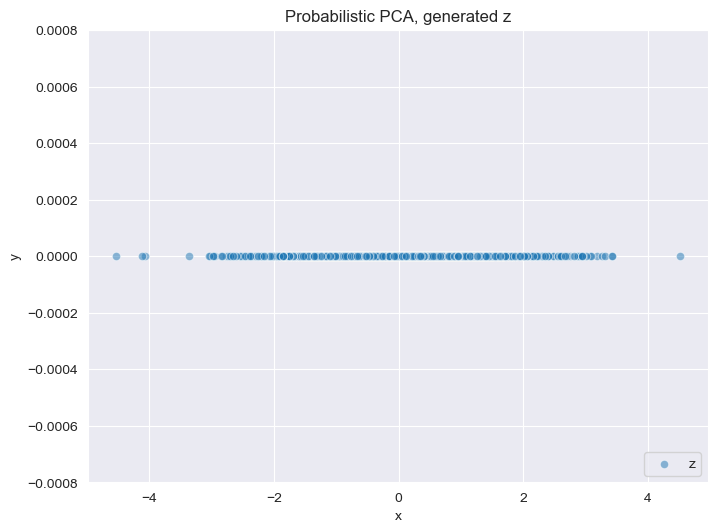

In [89]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(z[0, :], 0, alpha=0.5, label='z')
origin = [0], [0] # origin point

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title('Probabilistic PCA, generated z')
plt.show()

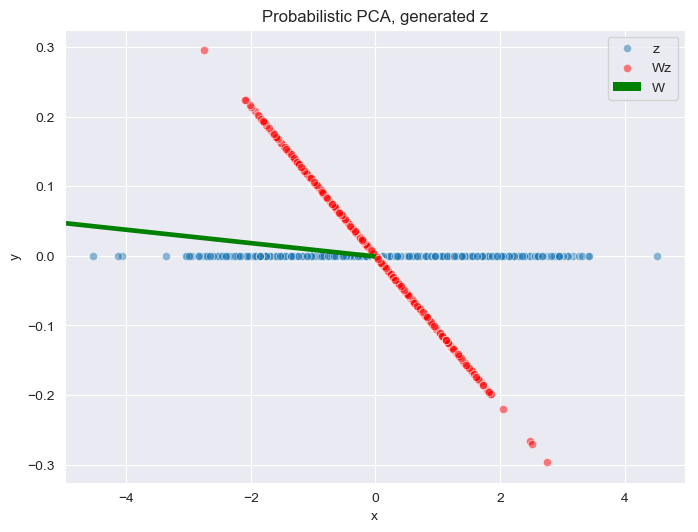

In [96]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(z[0, :], 0, alpha=0.5, label='z')
sns.scatterplot(mean[0, :], mean[1, :], color='red', alpha=0.5, label='Wz')
origin = [0], [0] # origin point
#Plot the principal axis
plt.quiver(*origin, w[0,0], w[1,0], color=['g'], scale=1, label='W')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.title('Probabilistic PCA, generated z')
plt.show()

In [91]:
print(x)

[[ 2.54607646 -2.29734781  0.48287155 ...  0.03014842 -1.04560512
  -0.64827475]
 [-0.1049034  -0.56708834  0.16910261 ... -0.65630482 -0.21093167
  -2.17181129]]


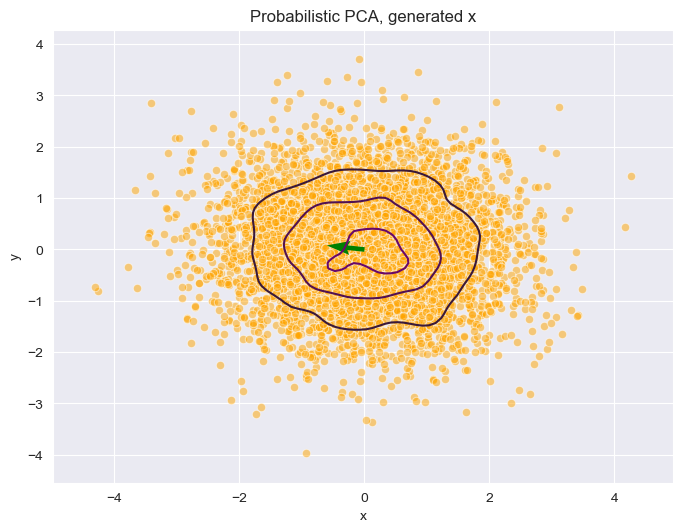

In [92]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(x[0, :], x[1, :], color='orange', alpha=0.5)
#plt.axis([-5, 5, -5, 5])
plt.xlabel('x')
plt.ylabel('y')
#Plot the principal axis
plt.quiver(*origin, w[0,0], w[1,0], color=['g'], scale=10, label='W')

#Plot probability density contours
sns.kdeplot(x[0, :], x[1, :], n_levels=3, color='purple')

plt.title('Probabilistic PCA, generated x')
plt.show()

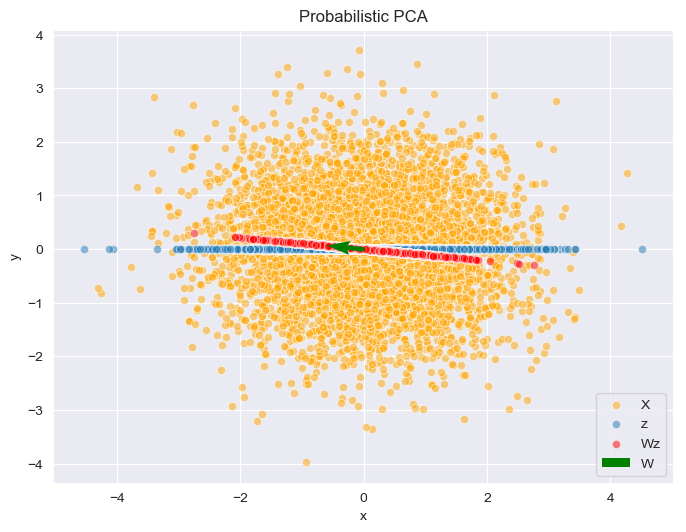

In [93]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

sns.scatterplot(x[0, :], x[1, :], color='orange', alpha=0.5, label='X')
sns.scatterplot(z[0, :], 0, alpha=0.5, label='z')
sns.scatterplot(mean[0, :], mean[1, :], color='red', alpha=0.5, label='Wz')

origin = [0], [0] # origin point
#Plot the principal axis
plt.quiver(*origin, w[0,0], w[1,0], color=['g'], scale=10, label='W')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title('Probabilistic PCA')
plt.show()

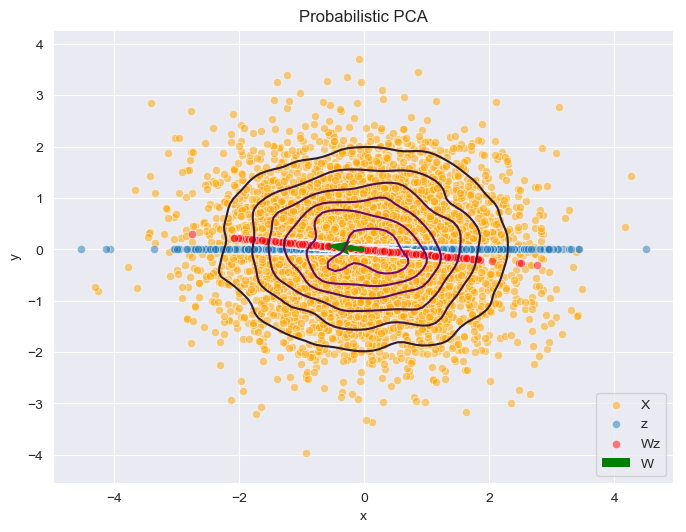

In [94]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

sns.scatterplot(x[0, :], x[1, :], color='orange', alpha=0.5, label='X')
sns.scatterplot(z[0, :], 0, alpha=0.5, label='z')
sns.scatterplot(mean[0, :], mean[1, :], color='red', alpha=0.5, label='Wz')

origin = [0], [0] # origin point
#Plot the principal axis
plt.quiver(*origin, w[0,0], w[1,0], color=['g'], scale=10, label='W')

#Plot probability density contours
sns.kdeplot(x[0, :], x[1, :], n_levels=6, color='purple')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title('Probabilistic PCA')
plt.show()

def main():
    fig = plt.figure()
    scat = plt.scatter(mean[0, :], color='red', alpha=0.5, label='Wz')

    ani = animation.FuncAnimation(fig, update_plot, frames=xrange(N),
                                  fargs=(scat))
    plt.show()

def update_plot(i, scat):
    scat.set_array(data[i])
    return scat,

main()